In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os 
os.chdir('/content/drive/Shareddrives/AC297r Project - RFCx /code')
import sys
import json
import numpy as np

from specinput import wave_to_mel_spec, load_audio, params
import matplotlib.pyplot as plt
import librosa
import librosa.display

from datagen import get_files_and_labels, scalespec, preprocess, DataGenerator
from specinput import load_audio, wave_to_mel_spec

Mounted at /content/drive


In [ ]:
def noise_injection(data, sample_rate):
    # noize_factor random between 0.001 to 0.005
    noise_factor = np.random.uniform(0.001, 0.005)
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

def shift_time(data, sampling_rate):
    #shift time between 0.1 to 1 second
    shift_max= np.random.uniform(0.1, 1)
    shift = int(np.round(sampling_rate * shift_max)) # np.random.randint(
    direction = np.random.randint(0, 2)
    if direction == 1:
        shift = -shift
    augmented_data = np.roll(data, shift)
    return augmented_data

def change_pitch(data, sample_rate):
    n_step = np.random.uniform(-2,2)
    augmented_data = librosa.effects.pitch_shift(y=data, sr=sample_rate, n_steps=n_step)
    return augmented_data

    
def change_speed(data, sample_rate):
    speed_factor= np.random.uniform(0.75, 1.25) 
    augmented_data = librosa.effects.time_stretch(data, speed_factor)
    return augmented_data

In [ ]:
method_dict = {"1":noise_injection, "2":shift_time, "3":change_pitch, "4":change_speed}
method = "1" # change method if you need

In [ ]:
# %autosave 0
# change datapath if you are not running this using colab
original_file_path = "/content/drive/Shareddrives/AC297r Project - RFCx /audio_data/train/audio/" # audio data(.wav)

output_file_path = '/content/drive/Shareddrives/AC297r Project - RFCx /aug_image_data/puerto-rico/train/filtered' # npy file
output_file_path = output_file_path + "_"+method+'/'

if not os.path.exists(output_file_path):
    os.mkdir(output_file_path)
    
if not os.path.exists(output_file_path + 'p/'):
    os.mkdir(output_file_path + 'p/')
if not os.path.exists(output_file_path + 'n/'):
    os.mkdir(output_file_path + 'n/')

In [ ]:
# %autosave 0
for c in os.listdir(original_file_path + 'p/'):
    if not os.path.exists(output_file_path + 'p/' + c):
        os.mkdir(output_file_path + 'p/'+c)
    for f in os.listdir(original_file_path + 'p/' + c):
        if ".wav" != f[-4::]:
            continue
        file_name = f[0:-4]
        aug_file_name = file_name +"_" + method + "_aug.npy"
        data, sample_rate = load_audio(original_file_path + 'p/' + c + '/' +f)
        np.save(output_file_path+'p/'+c+'/'+file_name+".npy", wave_to_mel_spec(data))
        for m in method:
            data = method_dict[m](data, sample_rate)
        data = wave_to_mel_spec(data)
        np.save(output_file_path+'p/'+c+'/'+aug_file_name, data)
    

for c in os.listdir(original_file_path + 'n/'):
    if not os.path.exists(output_file_path + 'n/' + c):
        os.mkdir(output_file_path + 'n/'+c)
    for f in os.listdir(original_file_path + 'n/' + c):
        if ".wav" != f[-4::]:
          continue
        file_name = f[0:-4]
        aug_file_name = file_name +"_"+method+"_aug.npy"
        data, sample_rate = load_audio(original_file_path + 'n/'+ c + '/' + f)
        np.save(output_file_path+'n/'+c+'/'+file_name+".npy", wave_to_mel_spec(data))
        for m in method:
            data = method_dict[m](data, sample_rate)
        data = wave_to_mel_spec(data)
        np.save(output_file_path+'n/'+c+'/'+aug_file_name, data)

In [ ]:
# remove auto-generated .ipynb_checkpoints and .DS_Store dir
if os.path.exists(output_file_path + "n/.ipynb_checkpoints"):
    os.rmdir(output_file_path + "n/.ipynb_checkpoints")
if os.path.exists(output_file_path + "n/.ipynb_checkpoints"):
    os.rmdir(output_file_path + "n/.ipynb_checkpoints")

if os.path.exists(output_file_path + "n/.DS_Store"):
    os.rmdir(output_file_path + "n/.DS_Store")
if os.path.exists(output_file_path + "n/.DS_Store"):
    os.rmdir(output_file_path + "n/.DS_Store")

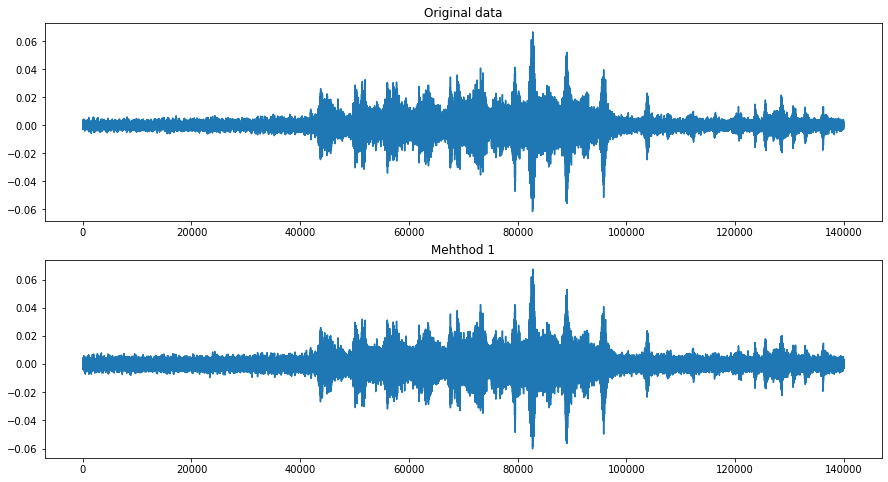

In [ ]:
# visualize one sample
c1 = os.listdir(original_file_path + 'p/')[0]
path = original_file_path+'p/'+c1 + '/' + os.listdir(original_file_path+'p/'+c1)[0] 
data, sample_rate = load_audio(path)
aug_data = method_dict[m](data, sample_rate)
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(data)
axes[0].set_title("Original data")
axes[1].plot(aug_data)
axes[1].set_title(f"Mehthod {method}")

plt.show()

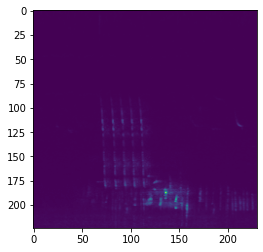

In [ ]:
c1 = os.listdir(output_file_path + 'p/')[0]
original_path = output_file_path+'p/'+c1 + '/' + os.listdir(output_file_path+'p/'+c1)[0] 
aug_path = output_file_path+'p/'+c1 + '/' + os.listdir(output_file_path+'p/'+c1)[1] 
original_data = np.load(original_path)
aug_data = np.load(aug_path)
# example of positive original nparray
plt.imshow(original_data.reshape(original_data.shape[0], original_data.shape[1]))

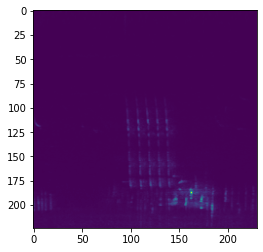

In [ ]:
# example of positive aug nparray
plt.imshow(aug_data.reshape(aug_data.shape[0], aug_data.shape[1]))

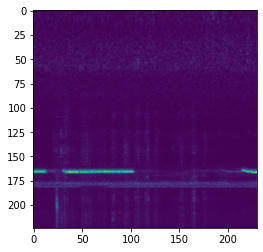

In [ ]:
c1 = os.listdir(output_file_path + 'n/')[0]
original_path = output_file_path+'n/'+c1 + '/' + os.listdir(output_file_path+'n/'+c1)[0] 
aug_path = output_file_path+'n/'+c1 + '/' + os.listdir(output_file_path+'n/'+c1)[1] 
original_data = np.load(original_path)
aug_data = np.load(aug_path)

# example of negative aug nparray
plt.imshow(original_data.reshape(original_data.shape[0], original_data.shape[1]))

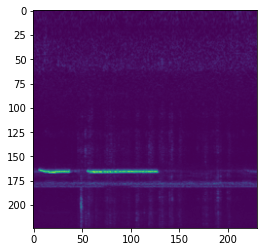

In [ ]:
# example of negative aug nparray
plt.imshow(aug_data.reshape(aug_data.shape[0], aug_data.shape[1]))

In [ ]:
aug_data.shape

(224, 205, 1)

In [ ]:
# for c in os.listdir(original_file_path + 'p/'):
#     print(c, len(os.listdir(output_file_path + 'p/' + c)))
    # if len(os.listdir(output_file_path + 'p/' + c))==0:
    #     print(c)
    #     for f in os.listdir(original_file_path + 'p/' + c):
    #         if ".wav" != f[-4::]:
    #             continue
    #         file_name = f[0:-4]
    #         aug_file_name = file_name +"_"+method+"_aug.npy"
    #         data, sample_rate = load_audio(original_file_path + 'p/' + c + '/' +f)
    #         np.save(output_file_path+'p/'+c+'/'+file_name+".npy", wave_to_mel_spec(data))
    #         for m in method:
    #             data = method_dict[m](data, sample_rate)
    #         data = wave_to_mel_spec(data)
    #         np.save(output_file_path+'p/'+c+'/'+aug_file_name, data)
      

